<h2>Realizaremos un eda teniendo en mente nuestros 2 KPIs:<h2\>

-Reducir en un 10% la tasa de homicidios en siniestros viales de los últimos seis meses, en CABA, en comparación con la tasa de homicidios en siniestros viales del semestre anterior.

-Reducir en un 7% la cantidad de accidentes mortales de motociclistas en el último año, en CABA, respecto al año anterior.

También buscaremos otros posibles insights para elaborar un KPI

In [1]:
import pandas as pd
import matplotlib.pyplot as plt

Se cargan todas las tablas y se visualiza cada una de ellas

In [4]:
df_homicidios_hechos=pd.read_csv('processed_data/homicidios_hechos.csv')
df_homicidios_victimas=pd.read_csv('processed_data/homicidios_victimas.csv')
df_poblacion=pd.read_csv('processed_data/poblacion.csv')
df_radares= pd.read_csv('processed_data/radares_AUSA.csv')

In [25]:
df_homicidios_hechos.head()

,id,n_victimas,fecha,aaaa,mm,dd,hora,hh,tipo_de_calle,comuna,longitud,latitud,participantes,victima,acusado
0,2016-0001,1,2016-01-01,2016,1,1,04:00:00,4,AVENIDA,8,-58.47533969,-34.68757022,MOTO-AUTO,MOTO,AUTO
1,2016-0002,1,2016-01-02,2016,1,2,01:15:00,1,GRAL PAZ,9,-58.50877521,-34.66977709,AUTO-PASAJEROS,AUTO,PASAJEROS
2,2016-0003,1,2016-01-03,2016,1,3,07:00:00,7,AVENIDA,1,-58.39040293,-34.63189362,MOTO-AUTO,MOTO,AUTO
3,2016-0004,1,2016-01-10,2016,1,10,00:00:00,0,AVENIDA,8,-58.46503904,-34.68092974,MOTO-SD,MOTO,SD
4,2016-0005,1,2016-01-21,2016,1,21,05:20:00,5,AVENIDA,1,-58.38718297,-34.62246630,MOTO-PASAJEROS,MOTO,PASAJEROS


In [5]:
df_homicidios_victimas.head()

,id_hecho,fecha,aaaa,mm,dd,rol,victima,sexo,edad
0,2016-0001,2016-01-01,2016,1,1,CONDUCTOR,MOTO,MASCULINO,19
1,2016-0002,2016-01-02,2016,1,2,CONDUCTOR,AUTO,MASCULINO,70
2,2016-0003,2016-01-03,2016,1,3,CONDUCTOR,MOTO,MASCULINO,30
3,2016-0004,2016-01-10,2016,1,10,CONDUCTOR,MOTO,MASCULINO,18
4,2016-0005,2016-01-21,2016,1,21,CONDUCTOR,MOTO,MASCULINO,29


In [48]:
df_poblacion.head()

,comuna,total_pob
0,1,205991
1,2,157827
2,3,187537
3,4,218245
4,5,179005


In [5]:
df_radares.head()

,hora,cantidad_vehiculos
0,0.0,8817866
1,1.0,6099331
2,2.0,4207945
3,3.0,3454162
4,4.0,4963533


Comenzamos con un analis a una de las tablas que consideramos mas importantes, hechos

In [40]:
df_homicidios_hechos.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 691 entries, 0 to 690
Data columns (total 15 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   id             691 non-null    object
 1   n_victimas     691 non-null    int64 
 2   fecha          691 non-null    object
 3   aaaa           691 non-null    int64 
 4   mm             691 non-null    int64 
 5   dd             691 non-null    int64 
 6   hora           691 non-null    object
 7   hh             691 non-null    object
 8   tipo_de_calle  691 non-null    object
 9   comuna         691 non-null    int64 
 10  longitud       691 non-null    object
 11  latitud        691 non-null    object
 12  participantes  691 non-null    object
 13  victima        691 non-null    object
 14  acusado        691 non-null    object
dtypes: int64(5), object(10)
memory usage: 81.1+ KB


In [41]:
df_homicidios_hechos['hh'] = pd.to_numeric(df_homicidios_hechos['hh'], errors='coerce')

In [18]:
df_homicidios_hechos.describe()

,n_victimas,aaaa,mm,dd,hh,comuna
count,694.000000,694.000000,694.000000,694.000000,693.000000,694.000000
mean,1.030259,2018.194524,6.678674,15.917867,11.662338,7.446686
std,0.179644,1.682067,3.566993,8.641515,6.687598,4.375177
min,1.000000,2016.000000,1.000000,1.000000,0.000000,1.000000
25%,1.000000,2017.000000,4.000000,9.000000,6.000000,4.000000
50%,1.000000,2018.000000,7.000000,16.000000,11.000000,8.000000
75%,1.000000,2020.000000,10.000000,23.000000,17.000000,11.000000
max,3.000000,2021.000000,12.000000,31.000000,23.000000,15.000000


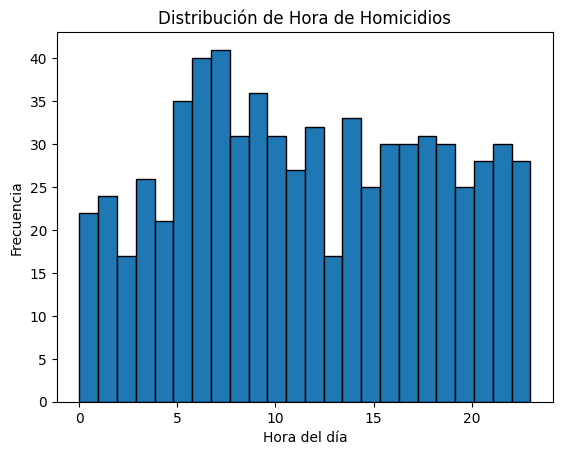

In [28]:
#Se realiza un histograma de la distribucion de la hora de los homicidios
plt.hist(df_homicidios_hechos['hh'], bins=24, edgecolor='black')
plt.title('Distribución de Hora de Homicidios')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.show()

Se identifica que entre las 6 y 7 de la mañana la frecuencia es mayor. Este es un horario pico(horario de entrada para muchos trabajadores) donde se presume que la circulacion de vehiculos es mayor.

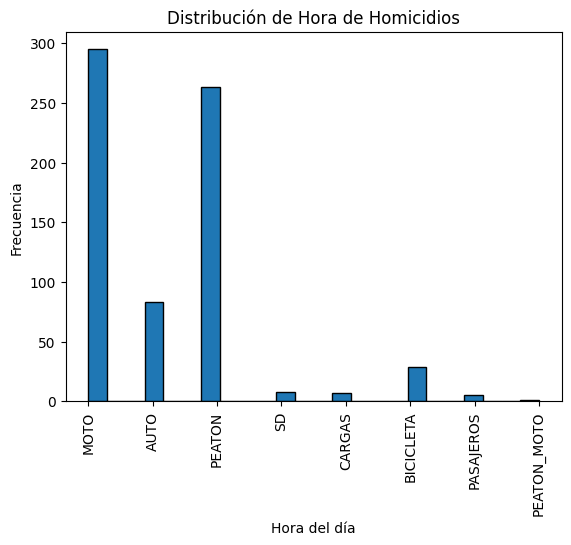

In [29]:
#Se realiza un histograma de la distribucion de las victimas de los homicidios
plt.hist(df_homicidios_hechos['victima'], bins=24, edgecolor='black')
plt.title('Distribución de victimas de Homicidios')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.xticks(rotation='vertical')
plt.show()

Se identifica que las victimas de accidentes fatales son en su mayoria motociclistas, seguido por peatones.

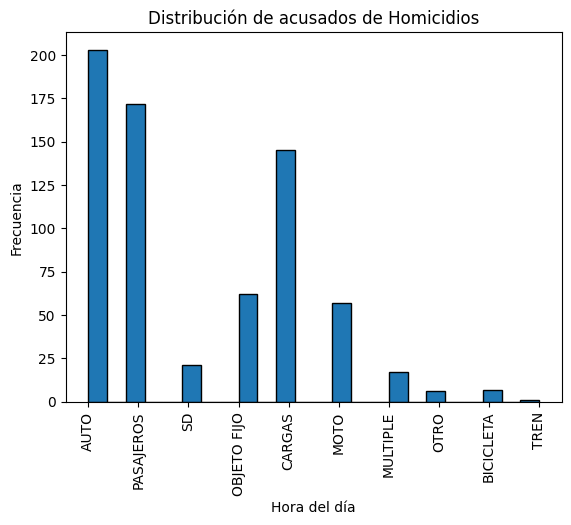

In [36]:
#Se realiza un histograma de la distribucion de los acusados de los homicidios
plt.hist(df_homicidios_hechos['acusado'], bins=24, edgecolor='black')
plt.title('Distribución de acusados de Homicidios')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.xticks(rotation='vertical')
plt.show()

Se identifica que los acusados mas frecuentes de accidentes fatales son autos, seguido por transportes de pasajeros y vehiculos de cargas.

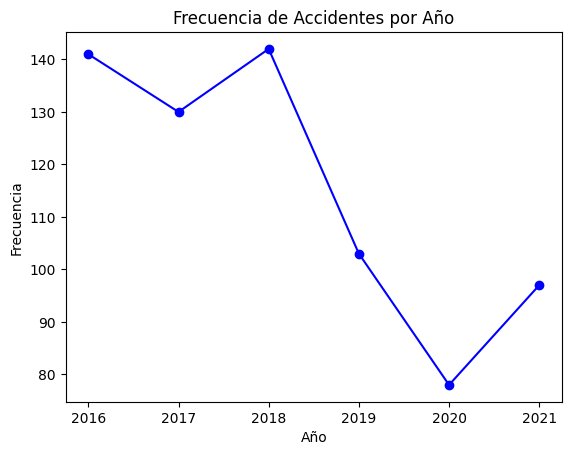

In [35]:
frecuencia_por_año = df_homicidios_hechos['aaaa'].value_counts().sort_index()

plt.plot(frecuencia_por_año.index, frecuencia_por_año.values, marker='o', linestyle='-', color='b')

plt.title('Frecuencia de Accidentes por Año')
plt.xlabel('Año')
plt.ylabel('Frecuencia')

# Mostrar el gráfico
plt.show()

Se puede ver que del año 2018 al 2020 la frecuencia de accidentes fatales venia en un fuerte descenso, pero en el año 2021 comienza a subir nuevamente

Analizamos también la tabla victimas, de la que podemos extraer informacion importante

In [16]:
df_homicidios_victimas.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 717 entries, 0 to 716
Data columns (total 9 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   id_hecho  717 non-null    object
 1   fecha     717 non-null    object
 2   aaaa      717 non-null    int64 
 3   mm        717 non-null    int64 
 4   dd        717 non-null    int64 
 5   rol       717 non-null    object
 6   victima   717 non-null    object
 7   sexo      717 non-null    object
 8   edad      717 non-null    object
dtypes: int64(3), object(6)
memory usage: 50.5+ KB


In [17]:
df_homicidios_hechos.describe()

,n_victimas,aaaa,mm,dd,comuna
count,693.000000,693.000000,693.000000,693.000000,693.000000
mean,1.028860,2018.196248,6.675325,15.937951,7.440115
std,0.175948,1.682668,3.568477,8.631533,4.374910
min,1.000000,2016.000000,1.000000,1.000000,1.000000
25%,1.000000,2017.000000,4.000000,9.000000,4.000000
50%,1.000000,2018.000000,7.000000,16.000000,8.000000
75%,1.000000,2020.000000,10.000000,23.000000,11.000000
max,3.000000,2021.000000,12.000000,31.000000,15.000000


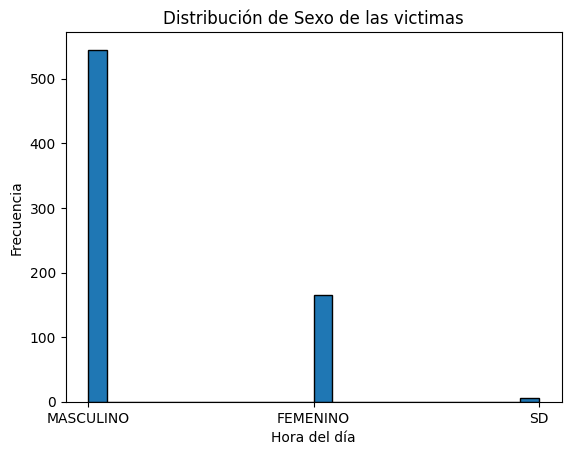

In [24]:
#Se realiza un histograma de la distribucion del sexo de las victimas
plt.hist(df_homicidios_victimas['sexo'], bins=24, edgecolor='black')
plt.title('Distribución de Sexo de las victimas')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.show()

Se observa que la cantidad de víctimas masculinos es significativamente mayor a la cantidad de femeninos. También hay unos pocos registros sin datos sobre el sexo de la victima.

In [ ]:
def asignar_rango_etario(edad):
    '''
    funcion que crea una nueva columna asignando el valor de rango etario segun la edad
    '''
    if 0 <= edad <= 12:
        return '0-12'
    elif 13 <= edad <= 20:
        return '13-20'
    elif 21 <= edad <= 55:
        return '21-55'
    elif 56 <= edad <= 70:
        return '56-70'
    else:
        return '70 o mas'

#Se crea la columna 'rango_etario' utilizando la función apply
df_filtered = df_homicidios_victimas[df_homicidios_victimas['edad'] != 'SD']
df_filtered['edad']=df_filtered['edad'].astype(int)
df_filtered['rango_etario'] = df_filtered['edad'].apply(asignar_rango_etario)


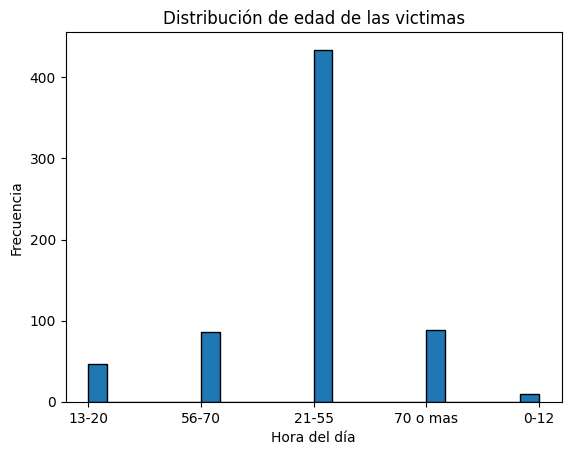

In [28]:
#Se realiza un histograma de la distribucion de la edad de las victimas
plt.hist(df_filtered['rango_etario'], bins=24, edgecolor='black')
plt.title('Distribución de edad de las victimas')
plt.xlabel('Hora del día')
plt.ylabel('Frecuencia')
plt.show()

Se observa que la cantidad de víctimas de entre 21 y 55 años de edad es significativamente mayor a la cantidad del resto de la poblacion.

Se visualiza la correlación entre el flujo de vehículos segun radares de AUSA y la cantidad de siniestros

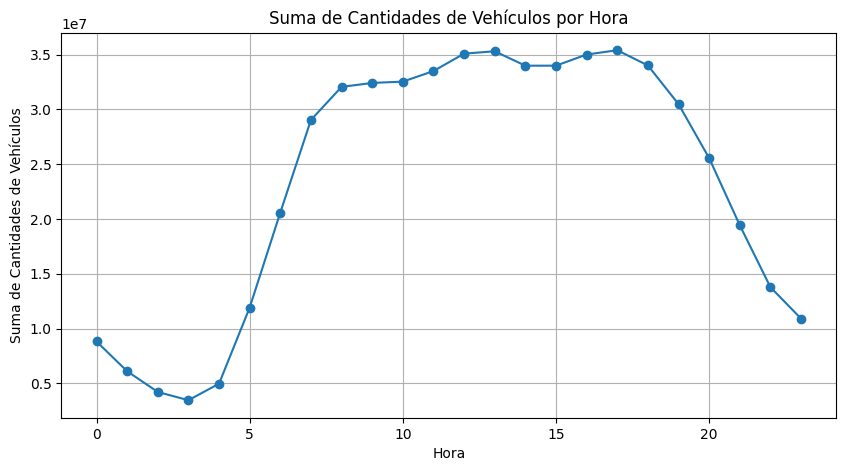

In [9]:
#flujo de vehiculos por hora


df_grouped = df_radares.groupby('hora')['cantidad_vehiculos'].sum().reset_index()
plt.figure(figsize=(10, 5))

plt.plot(df_grouped['hora'], df_grouped['cantidad_vehiculos'], marker='o')
plt.title('Suma de Cantidades de Vehículos por Hora')
plt.xlabel('Hora')
plt.ylabel('Suma de Cantidades de Vehículos')
plt.grid(True)
plt.show()

In [ ]:
df_filtered = df_homicidios_hechos[df_homicidios_hechos['hh'] != 'SD']
df_filtered['hh']=df_filtered['hh'].astype(int)
count_por_hh = df_filtered['hh'].value_counts()
count_por_hh = count_por_hh.sort_index()


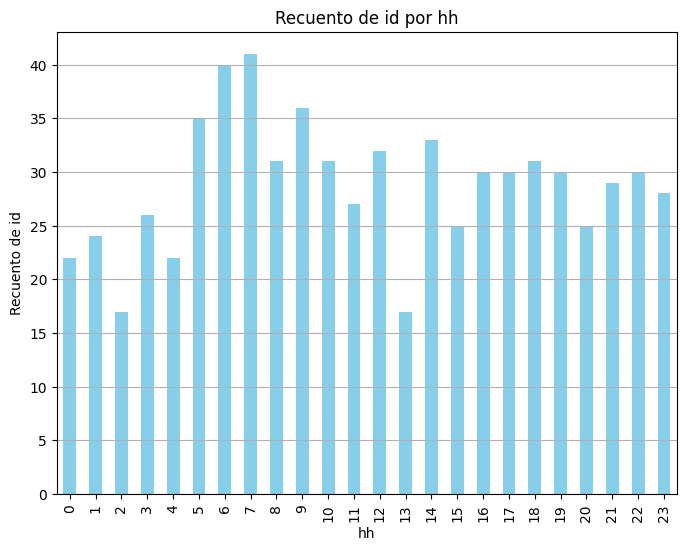

: 

In [30]:
#Cantidad de siniestros por hora
plt.figure(figsize=(8, 6))

count_por_hh.plot(kind='bar', color='skyblue')
plt.title('Recuento de id por hh')
plt.xlabel('hh')
plt.ylabel('Recuento de id')
plt.grid(axis='y')
plt.show()

Se puede visualizar que en el horario se observa una gran curva en el flujo de vehiculos entre las 5hs y las 7hs (representando la transicion de poco flujo vehicular a hora pico). En el grafico de cantidad de siniestros tambien podemos ver que entre las 5hs y las 7hs el recuento de siniestros es notablemente mayor respecto al resto. Este es un insight interesante para analizar y sobre el cual craremos un KPI.